In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [186]:
pop_file = 'Population_Data_2008_pivot_by_year.csv'
pop_read = pd.read_csv(pop_file)
pop_df = pd.DataFrame(pop_read)

counties = ['Los Angeles County', 'Sonoma County', 'Yuba County', 'Alameda County']

df_start = {}
pop_df_small = pd.DataFrame(df_start)

pop_df_small['Years'] = pop_df['Years']

for county in counties:
    pop_df_small[f'{county}'] = pop_df[f'{county}']

pop_df_small = pop_df_small.set_index('Years')
pop_df_small

,Los Angeles County,Sonoma County,Yuba County,Alameda County
Years,,,,
2008,9821342,468191,72473,1457169
2009,9848011,472102,72925,1491482
2010,9822433,484776,72350,1513043
2011,9876727,487423,72492,1530998
2012,9938436,490071,72792,1554138
2013,9998105,494243,73114,1580247
2014,10048408,498803,73562,1608674
2015,10097037,501346,74083,1634634
2016,10120540,503249,75002,1650306


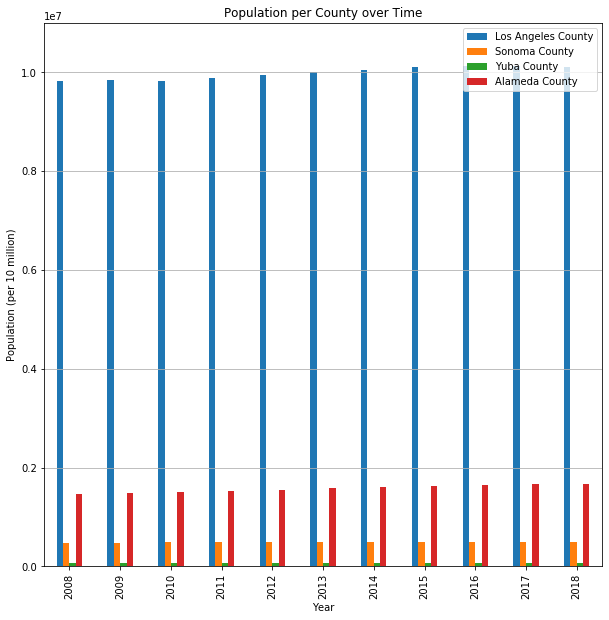

In [222]:
multi_plot = pop_df_small.plot(kind="bar", figsize=(10,10))
plt.ylim((0, 11000000)) 
multi_plot.yaxis.grid()
multi_plot.set_ylabel('Population (per 10 million)')
multi_plot.set_xlabel('Year')
multi_plot.set_title('Population per County over Time')
multi_plot
plt.savefig("Plot_images/Population_per_Year.png")

# Try to change colors of each specifically - Alameda(red) LA(blue) Yuba(green) Sonoma(purple)

In [213]:
dis_file = 'vaccine-preventable-disease-cases-by-county-and-year-2.csv'

counties2 = ['Los Angeles', 'Sonoma', 'Yuba', 'Alameda']
years2 = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017' ]
disease2 = ['Measles', 'Mumps', 'Pertussis', 'Tetanus']
drop_yrs = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]

dis_read = pd.read_csv(dis_file)
dis_df = pd.DataFrame(dis_read)
dis_df = dis_df.set_index('year')
dis_df = dis_df.drop(drop_yrs)        
        
dis_df = dis_df[dis_df['disease'].isin(disease2)] 
dis_df = dis_df[dis_df['county'].isin(counties2)]
dis_df = dis_df.reset_index()
dis_df = dis_df.groupby(['county','year']).sum().reset_index().set_index('year')

dis_df_al = dis_df[dis_df['county'] == 'Alameda'].drop(columns=['county']).rename(columns={'count':'Alameda'})
dis_df_la = dis_df[dis_df['county'] == 'Los Angeles'].drop(columns=['county']).rename(columns={'count':'Los Angeles'})
dis_df_so = dis_df[dis_df['county'] == 'Sonoma'].drop(columns=['county']).rename(columns={'count':'Sonoma'})
dis_df_yu = dis_df[dis_df['county'] == 'Yuba'].drop(columns=['county']).rename(columns={'count':'Yuba'})

dis_df_plot = pd.concat([dis_df_la, dis_df_so, dis_df_yu, dis_df_al], axis=1, sort=True)
dis_df_plot

,Los Angeles,Sonoma,Yuba,Alameda
year,,,,
2009,173,19,0,37
2010,1423,246,3,439
2011,656,117,1,236
2012,236,18,1,69
2013,378,51,4,139
2014,2232,704,10,426
2015,1234,34,3,195
2016,362,43,1,89
2017,668,21,31,134


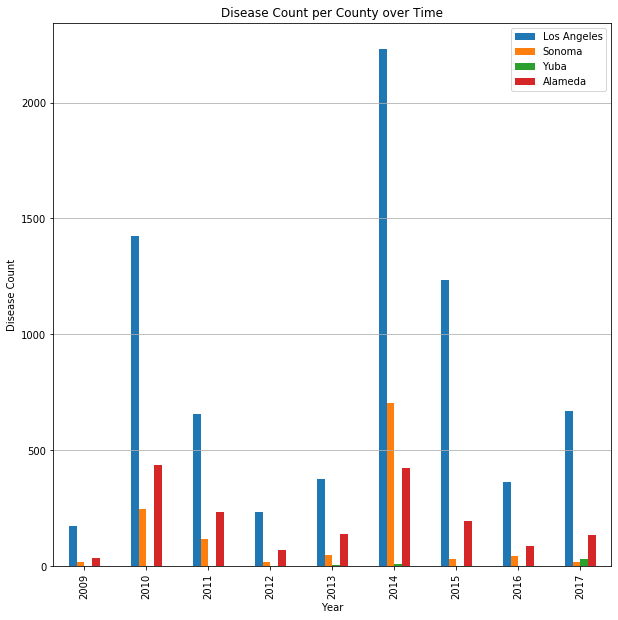

In [223]:
multi_plot2 = dis_df_plot.plot(kind="bar", figsize=(10,10))
#plt.ylim((0, 11000000)) 
multi_plot2.yaxis.grid()
multi_plot2.set_ylabel('Disease Count')
multi_plot2.set_xlabel('Year')
multi_plot2.set_title('Disease Count per County over Time')
multi_plot2
plt.savefig("Plot_images/Disease_Count_per_Year.png")